# NumPy

In [44]:
import numpy as np
# просто сидим генератор случайных чисел, чтобы набор чисел был всегда одинаковый
np.random.seed(0)

In [45]:
# Создание массивов
# One-dimensional array
x1 = np.random.randint(10, size=6)
# Two-dimensional array
x2 = np.random.randint(10, size=(3, 4))
# Three-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))

Параметр `size` задаёт размерность массива. Причем сначала задаётся количество строк. Например, размерность `size=(3, 4, 5` означает, что в массиве будет 3 строки, в каждой строке будут 4 строки и каждая строка будет содержать 5 элементов. Это хорошо видно при распечатке массива `np.random.randint(10, size=(3, 4, 5))`

In [46]:
print(x1)
print("-" * 50)
print(x2)
print("-" * 50)
print(x3)

[5 0 3 3 7 9]
--------------------------------------------------
[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]
--------------------------------------------------
[[[8 1 5 9 8]
  [9 4 3 0 3]
  [5 0 2 3 8]
  [1 3 3 3 7]]

 [[0 1 9 9 0]
  [4 7 3 2 7]
  [2 0 0 4 5]
  [5 6 8 4 1]]

 [[4 9 8 1 1]
  [7 9 9 3 6]
  [7 2 0 3 5]
  [9 4 4 6 4]]]


## Свойства массивов

`ndim` - количество измерений (многомерность массива)   
`shape` - форма массива (размер каждого измерения)   
`size` - общее количество элементов массива    
`dtype` - тип элементов массива    
`itemsize` - размер одного элемента массива в байтах    
`nbytes` - размер всего массива в байтах

In [47]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("x2 dtype: ", x2.dtype)
print("x3 itemsize ", x3.itemsize, " bytes")
print("x3 nbytes ", x3.nbytes, " bytes")

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
x2 dtype:  int64
x3 itemsize  8  bytes
x3 nbytes  480  bytes


## Доступ к элементам

### Чтение

In [48]:
# Одномерный массив
x1[3]

3

In [49]:
# Многомерный массив. Схема доступа: строка1, ... строкаN, элементN
x3[1, 1, 2]

3

### Запись

In [50]:
print(x1)
x1[2] = 4
print(x1)

[5 0 3 3 7 9]
[5 0 4 3 7 9]


#### Запись элемента другого типа

При записи элементов другого типа они будут приведены к типу элементов массива. **Имейте ввиду, что при этом может происходить потеря точности!**

In [51]:
x4 = np.array([True, False, True, True])
print(x4)
x4[1] = 15
print(x4)

[ True False  True  True]
[ True  True  True  True]


### Slicing

In [52]:
# одномерные массивы
print(x1)
x1[1:3]

[5 0 4 3 7 9]


array([0, 4])

In [53]:
## многомерные массивы
print(x2)
x2[:2, :3]

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


array([[3, 5, 2],
       [7, 6, 8]])

#### Доступ к колонкам или строка в многомерном массиве

In [54]:
print(x2[:, 0])  # first column of x2

[3 7 1]


In [55]:
print(x2[0, :])  # first row of x2

[3 5 2 4]


### Запись в подмассивы (слайсы)

**В отличие от Python, подмассивы (слайсы) `NumPy` предоставляют возможность записывать непосредственно в массив!!!**

Подмассив представляет собой `no-copy view` исходного массива, а не новый массив.

In [56]:
print(x2)

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


In [57]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[3 5]
 [7 6]]


In [58]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [59]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


### Creating copies of arrays

In [60]:
# Можно воспользоваться методом `copy()`
# Если изменить копию, то оригинальный массив останется нетронутым!!!
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


## Изменение формы массива

In [61]:
grid = np.arange(1, 10)
print(grid)
grid2 = grid.reshape((3, 3))
print(grid2)

[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [62]:
## Еще один способ изменить форму массива - это использовать ключевое слово `np.newaxis` в операции среза
x = np.array([1, 2, 3])

# row vector via reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [63]:
# row vector via newaxis
x[np.newaxis, :]

array([[1, 2, 3]])

In [64]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [65]:
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

## Соединение и разделение массивов

### Соединение массивов

In [66]:
# Метод `concatenate`
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
z = [91, 92, 93]
np.concatenate((x, y, z))

array([ 1,  2,  3,  3,  2,  1, 91, 92, 93])

In [67]:
# `concatenate` работает и на многомерных массивах

In [68]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [69]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [70]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

Для работы с многомерными массивами, особенно с различной размерностью, намного более понятно использовать методы `np.vstack` (вертикальный стек) и `np.hstack` (горизонтальный стек).

In [71]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [72]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

### Разделение массивов

Разделение осуществляется функциями `np.split`, `np.hsplit`, и `np.vsplit`. Для каждой из этих функций мы можем передать список индексов, задающих точки разделения, а именно позиции в массиве, которые станут началами новых массивов.    
**Для N точек разделения всегда получается N+1 подмассивов.**

In [73]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])  # индексы 3 и 5 в исходном массиве являются точками разделения на массивы
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


Функции `np.hsplit` и `np.vsplit` работают следующим образом:

In [74]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [75]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [76]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


## Вычисления на массивах, универсальные функции

### Примеры ufuncs

In [77]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


### Абсолютные значения

In [78]:
x = np.array([-2, -1, 0, 1, 2])
print(abs(x))
print(np.abs(x))  # эквивалентная функция np.abs

[2 1 0 1 2]
[2 1 0 1 2]


### Тригонометрические функции

In [82]:
theta = np.linspace(0, np.pi, 3)

In [83]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [86]:
# Обратные функции также доступны
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


### Экспонента и логармфмы

In [88]:
# экспоненциальные функции
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


In [89]:
# логарифмические функции
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


In [90]:
# Для очень маленьких значений существуют специальные функции, которые позволяют сохранить точность
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


## Продвинутые ufunc-функции

### Массив для вывода результатов

Иногда бывает полезно сохранить результаты вычислений в отдельный массив. Это возможно при использовании аргумента `out`.

In [95]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(x)
print(y)

[0 1 2 3 4]
[ 0. 10. 20. 30. 40.]


Можно даже указать в какие элементы массива нужно записать результаты. Например, в следующем примере результаты записываются в каждый второй элемент.

In [97]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


### Функции для аггрерирования

Например, для выполнения операции `reduce` (сокращение массива до одного элемента), мы можем вызвать метод `reduce` для каждой `ufunc`:

In [99]:
x = np.arange(1, 6)
np.add.reduce(x)

15

### Внешнее произведение (outer product)

Любая `ufunc` имеет метод `outer` для вычисления всех пар двух различных матриц (массивов) - **декартовое произведение матриц!!!**

In [111]:
x = np.arange(1, 6)
print(x)

print("Простое произведение значений:", np.multiply(x, x))
print("Внешнее произведение:\n", np.multiply.outer(x, x))

[1 2 3 4 5]
Простое произведение значений: [ 1  4  9 16 25]
Внешнее произведение:
 [[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


### Сумма значений массива

In [123]:
L = np.random.random(100)
# sum(L) # так тоже можно
L.sum()

51.78328625510185

### Минимумы и максимумы

In [125]:
big_array = np.random.rand(1000000)

In [126]:
np.min(big_array), np.max(big_array)

(1.4057692298008462e-06, 0.9999994392723005)

In [127]:
big_array.min(), big_array.max()

(1.4057692298008462e-06, 0.9999994392723005)

### Агрегатные функции для многомерных данных

In [133]:
M = np.random.random((3, 4))
print(M)

[[0.49686444 0.85873118 0.70165192 0.99924257]
 [0.92672968 0.21264644 0.04977342 0.55567454]
 [0.1347961  0.725087   0.29946205 0.67857082]]


По умолчанию все агрегатные функции применяются ко всему массиву:

In [137]:
M.sum()

6.6392301550715995

Для работы с многомерными данными агрегатные функции имеют специальный аргумент `axis` для задания оси, вдоль которой будет применяться функция.

In [139]:
M.sum(axis=0)  # находит сумму для каждой колонки

array([1.55839022, 1.79646462, 1.05088739, 2.23348792])

In [150]:
M.min(axis=0) # находит минимальные значения в каждой колонки

array([0.1347961 , 0.21264644, 0.04977342, 0.55567454])

In [149]:
# изменение оси приводит к из изменению результата расчета
M.min(axis=1)  # минимальные значения в каждом ряду

array([0.49686444, 0.04977342, 0.1347961 ])

In [152]:
M.max(axis=0) # находит максимальные значения в каждой колонке

array([0.92672968, 0.85873118, 0.70165192, 0.99924257])

### Прочие агрегатные функции

`NumPy` предоставляет множество агрегатных функций, в частности есть варианты для функций, которые работают с отсутствующими данными и возвращают `NaN`:

## Пример: какой средний рост у американских президентов

In [156]:
!head -4 notebooks/data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [162]:
import pandas as pd
data = pd.read_csv('notebooks/data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185 191 182]


In [165]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        180.04545454545453
Standard deviation: 6.983599441335736
Minimum height:     163
Maximum height:     193


In [169]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.75
Median:             182.0
75th percentile:    183.5


Можно попытаться сгенерировать изображение для визуального представления данных

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

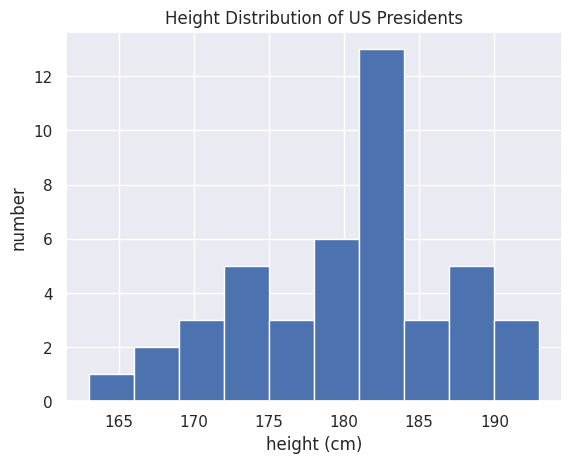

In [178]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

## Broadcasting

In [180]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting позволяет операции с массивами разной размерности. Например, мы легко можем добавить скалярную величину (представьте ее как массив с нулевой размерностью) к существующему массиву:

In [181]:
a + 5

array([5, 6, 7])

In [182]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [183]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Broadcasting как-бы дополняет одну матрицу до размерности другой, чтобы была возможность провести операцию.

![Broadcasting Visual](notebooks/figures/02.05-broadcasting.png)

### Правила broadcasting

Broadcasting в NumPy следует жесткому набору правил для определения порядка взаимодействия между двумя массивами:

    Правило 1: Если два массива различаются в размерности, форма массива с меньшей размерностью дополняется значениями его левой стороны.
    Правило 2: Если форма двух массивов различается в любых измерениях, массив с формой равной 1 в этом измерении, растягивается до измерения другого массива.
    Правило 3: Если по любому измерению размеры не совпадают и ни одно из измерений не равно 1, выбрасывается ошибка.

https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html#Broadcasting-example-1